Linear Regression Equation:

$$ y = \alpha + \beta_0X $$

Logistic Regression Equation:

$$ \log\left(\frac{p}{1 - p}\right) = \alpha + \beta_0X $$

$$ e^{\log\left(\frac{p}{1 - p}\right)} = e^{(\alpha + \beta_0X)} $$

$$ \frac{p}{1 - p} = e^{\alpha} \cdot e^{\beta_0X} $$

$$ p + p \cdot e^{\alpha} \cdot e^{\beta_0X} = e^{\alpha} \cdot e^{\beta_0X} $$

$$ p \cdot (1 + e^{\alpha} \cdot e^{\beta_0X}) = e^{\alpha} \cdot e^{\beta_0X} $$

$$ p = \frac{e^{\alpha} \cdot e^{\beta_0X}}{1 + e^{\alpha} \cdot e^{\beta_0X}} $$

$$ p = \frac{1}{1 + e^{-(\alpha + \beta_0X)}} $$


![image.png](attachment:image.png)


![1_CYAn9ACXrWX3IneHSoMVOQ.gif](attachment:1_CYAn9ACXrWX3IneHSoMVOQ.gif)

In [2]:
import pandas as pd
#import utils

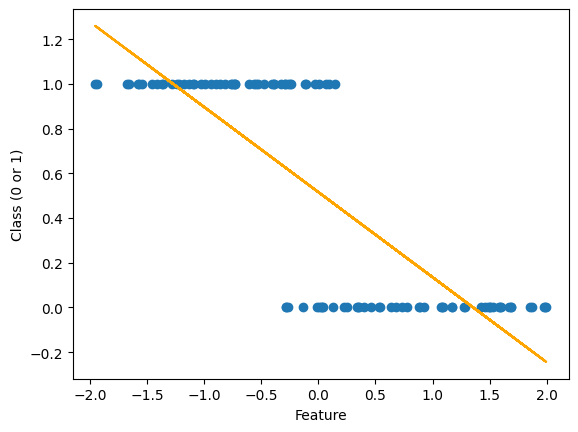

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# Generate data for category 0
X_category_0 = np.random.uniform(-0.3, 2, 50)
y_category_0 = np.zeros(50)

# Generate data for category 1
X_category_1 = np.random.uniform(-2, 0.2, 50)
y_category_1 = np.ones(50)

# Combine the data
X = np.concatenate((X_category_0, X_category_1))
y = np.concatenate((y_category_0, y_category_1))

# Reshape X into a column vector
X = X.reshape(-1, 1)

# Plot the data
plt.scatter(X, y, label="Data")
plt.xlabel("Feature")
plt.ylabel("Class (0 or 1)")

# Apply linear regression
linear_reg = LinearRegression()
linear_reg.fit(X, y)
linear_reg_line = linear_reg.predict(X)
plt.plot(X, linear_reg_line, label="Linear Regression", color="orange")

# Apply logistic regression



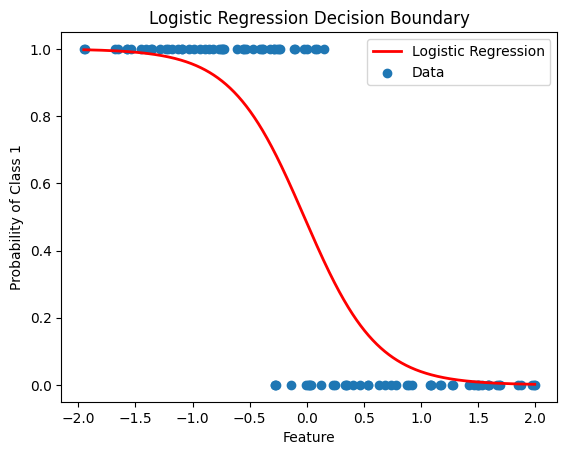

In [4]:
clf = LogisticRegression(random_state=42)
clf.fit(X, y)

# Compute probabilities for the decision boundary
X_line = np.linspace(X.min(), X.max(), 1000)
probs = clf.predict_proba(X_line.reshape(-1, 1))[:, 1]

# Plot the logistic regression decision boundary (sigmoid)
plt.plot(X_line, probs, label="Logistic Regression", color="red", linewidth=2)
plt.scatter(X, y, label="Data")
plt.xlabel("Feature")
plt.ylabel("Probability of Class 1")
plt.legend()
plt.title("Logistic Regression Decision Boundary")
plt.show()

In [18]:
import pandas as pd

df = pd.read_csv('bankloan.csv')

# Output printing out first 5 rows
df.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


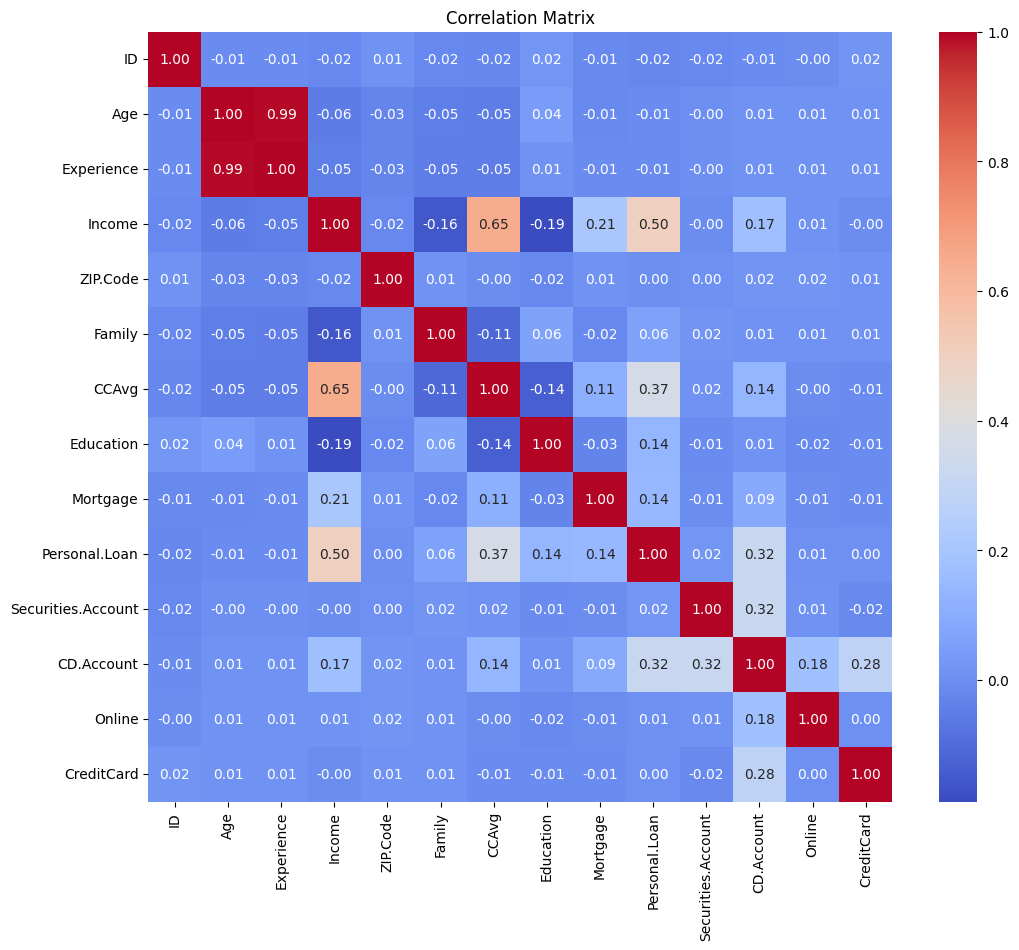

In [10]:
import seaborn as sns


correlation_matrix = df.corr()

# Plot the correlation matrix using seaborn's heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [19]:
x=df.drop(['Personal.Loan','ID','ZIP.Code'],axis=1)
y=df['Personal.Loan']
x

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities.Account,CD.Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0


In [20]:
# prompt: get correlation between all x columns (features) and y column (Personal loan)

correlation_matrix = x.corrwith(y)
print(correlation_matrix)

Age                  -0.007726
Experience           -0.007413
Income                0.502462
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Securities.Account    0.021954
CD.Account            0.316355
Online                0.006278
CreditCard            0.002802
dtype: float64


In [ ]:
#normalization


In [21]:
# prompt: I need to normalize the features in x

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x)
x_normalized = pd.DataFrame(x_normalized, columns=x.columns)
print(x_normalized)

           Age  Experience    Income    Family  CCAvg  Education  Mortgage  \
0     0.045455    0.086957  0.189815  1.000000   0.16        0.0  0.000000   
1     0.500000    0.478261  0.120370  0.666667   0.15        0.0  0.000000   
2     0.363636    0.391304  0.013889  0.000000   0.10        0.0  0.000000   
3     0.272727    0.260870  0.425926  0.000000   0.27        0.5  0.000000   
4     0.272727    0.239130  0.171296  1.000000   0.10        0.5  0.000000   
...        ...         ...       ...       ...    ...        ...       ...   
4995  0.136364    0.130435  0.148148  0.000000   0.19        1.0  0.000000   
4996  0.159091    0.152174  0.032407  1.000000   0.04        0.0  0.133858   
4997  0.909091    0.913043  0.074074  0.333333   0.03        1.0  0.000000   
4998  0.954545    0.934783  0.189815  0.666667   0.05        0.5  0.000000   
4999  0.113636    0.152174  0.347222  0.666667   0.08        0.0  0.000000   

      Securities.Account  CD.Account  Online  CreditCard  
0   

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5000
Number of rows in the training set: 3750
Number of rows in the test set: 1250


In [23]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
print(reg.score(X_test,y_test))

0.9448


In [25]:
predictions=reg.predict(X_test)

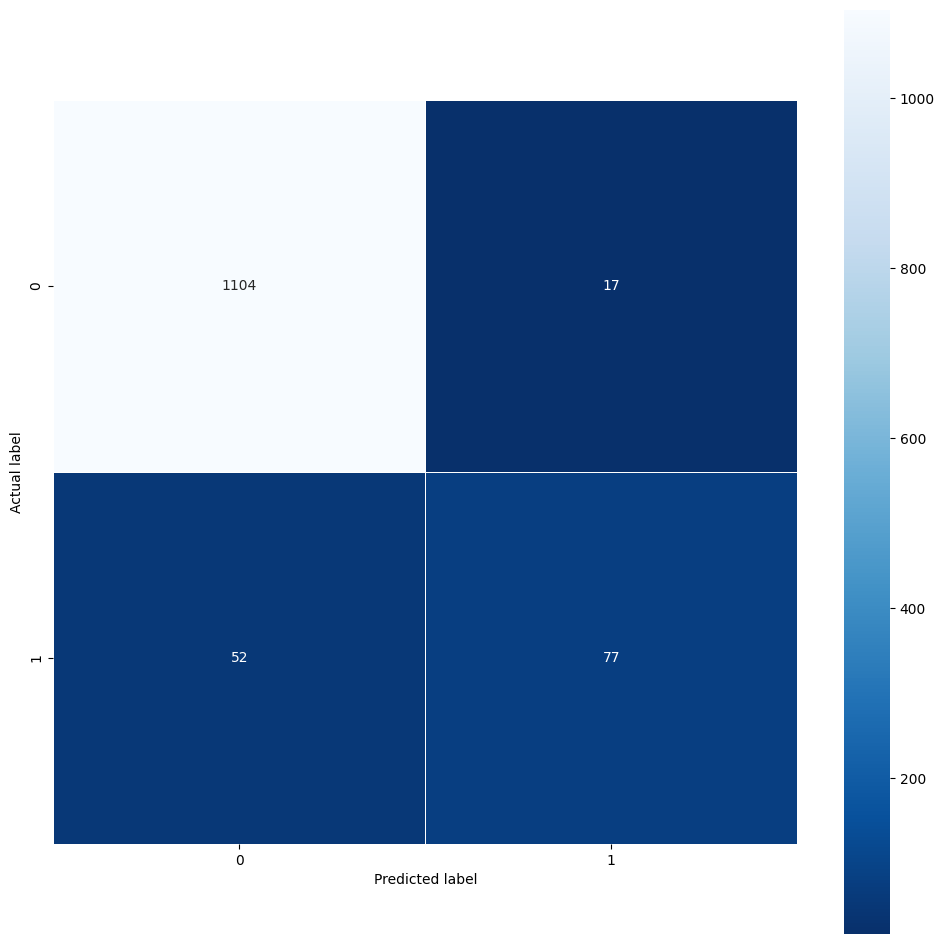

In [26]:
from sklearn import metrics
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

cm = metrics.confusion_matrix(y_true=y_test,
                         y_pred = predictions,
                        labels = [0,1])

plt.figure(figsize=(12,12));
sns.heatmap(cm, annot=True,
            linewidths=.5, square = True, cmap = 'Blues_r', fmt='0.4g');

plt.ylabel('Actual label');
plt.xlabel('Predicted label');

## Task

In [ ]:
# import the libraries
import numpy as np
import pandas as pd

# import the dataset
dataset = pd.read_excel('disease.xlsx')
dataset

,Age,BMI,Smoking_Status,Exercise_Frequency,Disease_Status
0,68,22.490324,1,0,1
1,58,23.018443,1,2,1
2,44,26.675358,0,2,1
3,37,23.442847,0,2,1
4,50,20.060222,1,1,1
...,...,...,...,...,...
995,37,23.956351,1,1,1
996,57,28.777964,0,1,1
997,60,22.243084,0,2,1
998,38,23.790133,0,2,1


In [ ]:
#apply preprocessing steps to (normalization or removal of non important features)

In [ ]:
# seperate X and y variables
x=
y=

In [27]:
# Train test split
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test =

#what is the shape of train and test data?

In [ ]:
# Make logisitic Regerssion

from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# score
print(reg.score(X_test,y_test))

0.86
